In [114]:
import numpy as np
import pandas as pd
import soundfile as sf
import datetime as dt
import matplotlib.pyplot as plt

from pathlib import Path

In [115]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

In [116]:
import src.subsampling as ss

In [117]:
input_dir = f'{Path.home()}/Documents/UBNA/Symposium/Recordings/AUTUMN_2022/CentralPond'
fall_audio_files = sorted(list(Path(input_dir).iterdir()))
date = "20221017"
dates = ["20221017"]
location = "Central Pond"

In [118]:
# ## Put together input parameters
cycle_length = 360
percent_on = 0.167
# tmp_dir = '../output/tmp/'
# output_dir = '../output_dir/'
# csv_name = "1min_every_6min__20220826_030000to130000.csv"

# dets = ss.run_subsampling_pipeline(input_dir, cycle_length, percent_on, csv_name, output_dir, tmp_dir)

In [119]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

dets = pd.read_csv(f"../output_dir/1min_every_6min__{location.split()[0]}_{date}_030000to130000.csv")
times = np.array([0, 600])
offset = 0

In [120]:
# for i in range(len(fall_audio_files)):
#     plot_file = fall_audio_files[i].name
#     plot_dets = dets[dets['input_file']==plot_file]

#     audio_file = sf.SoundFile(fall_audio_files[i])
#     fs = audio_file.samplerate

#     for adjust in [0, 600, 1200]:
#         reftimes = np.array([0, 600]) + adjust
#         audio_file.seek(reftimes[0]*fs)
#         audio_sec = audio_file.read((reftimes[1] - reftimes[0])*fs)

#         ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on)

#     offset += 1800

In [121]:
# ## Put together input parameters
cycle_length = 1800
percent_on = 1/6
# tmp_dir = '../output/tmp/'
# output_dir = '../output_dir/'
# csv_name = "5min_every_30min__20220826_030000to130000.csv"

# dets = ss.run_subsampling_pipeline(input_dir, cycle_length, percent_on, csv_name, output_dir, tmp_dir)

In [122]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

dets2 = pd.read_csv(f"../output_dir/5min_every_30min__{location.split()[0]}_{date}_030000to130000.csv")
times = np.array([0, 600])
offset = 0

In [123]:
# for i in range(len(summer_audio_files)):
#     plot_file = summer_audio_files[i].name
#     plot_dets2 = dets2[dets2['input_file']==plot_file]

#     audio_file = sf.SoundFile(summer_audio_files[i])
#     fs = audio_file.samplerate

#     for adjust in [0, 600, 1200]:
#         reftimes = np.array([0, 600]) + adjust
#         audio_file.seek(reftimes[0]*fs)
#         audio_sec = audio_file.read((reftimes[1] - reftimes[0])*fs)

#         ss.plt_msds_fromdf(location, plot_file, plot_dets2, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on)
    
#     offset += 1800

In [124]:
# ## Put together input parameters
# input_dir = f'{Path.home()}/Documents/UBNA/Symposium/Recordings/SUMMER_2022/CentralPond'
cycle_length = 1800
percent_on = 1.0
# tmp_dir = '../output/tmp/'
# output_dir = '../output_dir/'
# csv_name = "continuous__20220826_030000to130000.csv"

# dets = ss.run_subsampling_pipeline(summer_audio_files, cycle_length, percent_on, csv_name)

In [125]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
offset = 0

In [126]:
# for i in range(len(summer_audio_files)):
#     plot_file = summer_audio_files[i].name
#     plot_c_dets = c_dets[c_dets['input_file']==plot_file]

#     audio_file = sf.SoundFile(summer_audio_files[i])
#     fs = audio_file.samplerate

#     for adjust in range(0, 1800, 30):
#         times = np.array([0, 30])
#         reftimes = times + adjust
#         audio_file.seek(reftimes[0]*fs)
#         audio_sec = audio_file.read((reftimes[1] - reftimes[0])*fs)
#         ss.plt_msds_fromdf(location, plot_file, plot_c_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on)
        
#     offset += 1800

In [127]:
times = ["030000", "033000", "040000", "043000",
         "050000", "053000", "060000", "063000",
         "070000", "073000", "080000", "083000",
         "090000", "093000", "100000", "103000",
         "110000", "113000", "120000", "123000",
         "130000"]
presence_threshold = 1

labels = []
for f_date in dates:
    for time in times:
        labels.append(f'{f_date}_{time}.WAV')

datetime_hour_min_info = set()
datetime_date_info = set()
for label in labels:
    date_and_time = dt.datetime.strptime(label, '%Y%m%d_%H%M%S.WAV')
    datetime_hour_min_info.add(dt.datetime.strftime(date_and_time, "%H:%M"))
    datetime_date_info.add(dt.datetime.strftime(date_and_time, "%Y-%m-%d"))


In [128]:
def get_dets_from_csv_files(date, location):
    dets1 = pd.read_csv(f"../output_dir/1min_every_6min__{location.split()[0]}_{date}_030000to130000.csv")
    dets2 = pd.read_csv(f"../output_dir/5min_every_30min__{location.split()[0]}_{date}_030000to130000.csv")
    c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")

    return c_dets, dets1, dets2

def get_dets_lfdets_and_hfdets(dets, filename):
    detects = dets[dets['input_file']==filename]
    lfdetects = detects[detects["high_freq"] < 40000]
    hfdetects = detects[detects["low_freq"] > 40000]

    return detects, lfdetects, hfdetects

def add_num_to_buckets(bucket1, bucket2, bucket3, num1, num2, num3):
    bucket1 = np.hstack([bucket1, [num1]])
    bucket2 = np.hstack([bucket2, [num2]])
    bucket3 = np.hstack([bucket3, [num3]])

    return bucket1, bucket2, bucket3

def get_presence_from_numdets(num_dets, num_lfdets, num_hfdets, presence_threshold):
    presence = np.ones(num_dets.shape[0])
    presence[num_dets < presence_threshold] = 0
    lfpresence = np.ones(num_lfdets.shape[0])
    lfpresence[num_lfdets < presence_threshold] = 0
    hfpresence = np.ones(num_hfdets.shape[0])
    hfpresence[num_hfdets < presence_threshold] = 0

    return presence, lfpresence, hfpresence

In [129]:
presence1_over_days = np.array([])
lfpresence1_over_days = np.array([])
hfpresence1_over_days = np.array([])

presence2_over_days = np.array([])
lfpresence2_over_days = np.array([])
hfpresence2_over_days = np.array([])

c_presence_over_days = np.array([])
c_lfpresence_over_days = np.array([])
c_hfpresence_over_days = np.array([])

for i, f_date in enumerate(dates):
    num_c_dets = np.array([])
    num_dets2 = np.array([])
    num_dets1 = np.array([])

    num_lfdets1 = np.array([])
    num_lfdets2 = np.array([])
    num_c_lfdets = np.array([])

    num_hfdets1 = np.array([])
    num_hfdets2 = np.array([])
    num_c_hfdets = np.array([])

    c_dets, dets, dets2 = get_dets_from_csv_files(f_date, location)

    for label in labels:
        if (label[:8] == f_date):
            detects1, lfdetects1, hfdetects1 = get_dets_lfdets_and_hfdets(dets, label)
            num_dets1, num_lfdets1, num_hfdets1 = add_num_to_buckets(num_dets1, num_lfdets1, num_hfdets1, 
                                                                    detects1.shape[0], lfdetects1.shape[0], hfdetects1.shape[0])
            
            detects2, lfdetects2, hfdetects2 = get_dets_lfdets_and_hfdets(dets2, label)
            num_dets2, num_lfdets2, num_hfdets2 = add_num_to_buckets(num_dets2, num_lfdets2, num_hfdets2, 
                                                                    detects2.shape[0], lfdetects2.shape[0], hfdetects2.shape[0])
            

            cdetects, c_lfdetects, c_hfdetects = get_dets_lfdets_and_hfdets(c_dets, label)
            num_c_dets, num_c_lfdets, num_c_hfdets = add_num_to_buckets(num_c_dets, num_c_lfdets, num_c_hfdets, 
                                                                    cdetects.shape[0], c_lfdetects.shape[0], c_hfdetects.shape[0])

    presence1, lfpresence1, hfpresence1 = get_presence_from_numdets(num_dets1, num_lfdets1, num_hfdets1, presence_threshold)
    presence2, lfpresence2, hfpresence2 = get_presence_from_numdets(num_dets2, num_lfdets2, num_hfdets2, presence_threshold)
    c_presence, c_lfpresence, c_hfpresence = get_presence_from_numdets(num_c_dets, num_c_lfdets, num_c_hfdets, presence_threshold)

    if (i==0):
        presence1_over_days = np.hstack((presence1_over_days, presence1))
        lfpresence1_over_days = np.hstack((lfpresence1_over_days, lfpresence1))
        hfpresence1_over_days = np.hstack((hfpresence1_over_days, hfpresence1))

        presence2_over_days = np.hstack((presence2_over_days, presence2))
        lfpresence2_over_days = np.hstack((lfpresence2_over_days, lfpresence2))
        hfpresence2_over_days = np.hstack((hfpresence2_over_days, hfpresence2))

        c_presence_over_days = np.hstack((c_presence_over_days, c_presence))
        c_lfpresence_over_days = np.hstack((c_lfpresence_over_days, c_lfpresence))
        c_hfpresence_over_days = np.hstack((c_hfpresence_over_days, c_hfpresence))
    else:
        presence1_over_days = np.vstack((presence1_over_days, presence1))
        lfpresence1_over_days = np.vstack((lfpresence1_over_days, lfpresence1))
        hfpresence1_over_days = np.vstack((hfpresence1_over_days, hfpresence1))

        presence2_over_days = np.vstack((presence2_over_days, presence2))
        lfpresence2_over_days = np.vstack((lfpresence2_over_days, lfpresence2))
        hfpresence2_over_days = np.vstack((hfpresence2_over_days, hfpresence2))

        c_presence_over_days = np.vstack((c_presence_over_days, c_presence))
        c_lfpresence_over_days = np.vstack((c_lfpresence_over_days, c_lfpresence))
        c_hfpresence_over_days = np.vstack((c_hfpresence_over_days, c_hfpresence))


if (len(c_presence_over_days.shape) == 1):
    c_presence_over_days = c_presence_over_days.reshape((1, 21))
if (len(presence1_over_days.shape) == 1):    
    presence1_over_days = presence1_over_days.reshape((1, 21))
if (len(presence2_over_days.shape) == 1):       
    presence2_over_days = presence2_over_days.reshape((1, 21))

if (len(c_lfpresence_over_days.shape) == 1):
    c_lfpresence_over_days = c_lfpresence_over_days.reshape((1, 21))
if (len(lfpresence1_over_days.shape) == 1):    
    lfpresence1_over_days = lfpresence1_over_days.reshape((1, 21))
if (len(lfpresence2_over_days.shape) == 1):       
    lfpresence2_over_days = lfpresence2_over_days.reshape((1, 21))

if (len(c_hfpresence_over_days.shape) == 1):
    c_hfpresence_over_days = c_hfpresence_over_days.reshape((1, 21))
if (len(hfpresence1_over_days.shape) == 1):    
    hfpresence1_over_days = hfpresence1_over_days.reshape((1, 21))
if (len(hfpresence2_over_days.shape) == 1):       
    hfpresence2_over_days = hfpresence2_over_days.reshape((1, 21))

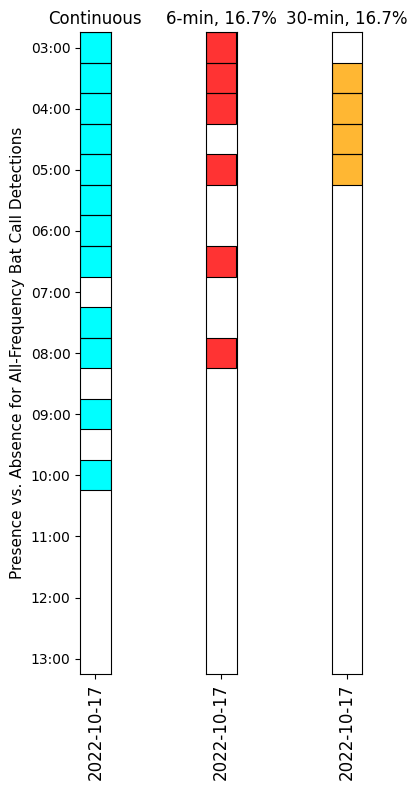

In [130]:
def rect(pos):
    r = plt.Rectangle(pos-0.505, 1, 1, facecolor="none", edgecolor="k", linewidth=0.8)
    plt.gca().add_patch(r)

plt.figure(figsize=(5, 8))
plt.rcParams.update({'font.size': 10})

datetime_info = sorted(list(datetime_hour_min_info))
date_info = sorted(list(datetime_date_info))

time_ticks = np.arange(c_presence_over_days.shape[1])[::2]
date_ticks = np.arange(c_presence_over_days.shape[0])

plt.subplot(131)
plt.title("Continuous")
plt.ylabel("Presence vs. Absence for All-Frequency Bat Call Detections", fontsize=11)
plot_cp_overdays = c_presence_over_days.T
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
     rect(pos)
plt.yticks(time_ticks, datetime_info[::2])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.subplot(132)
plt.title("6-min, 16.7%")
plot_p1_overdays = presence1_over_days.T
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.subplot(133)
plt.title("30-min, 16.7%")
plot_p2_overdays = presence2_over_days.T
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_&_hf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

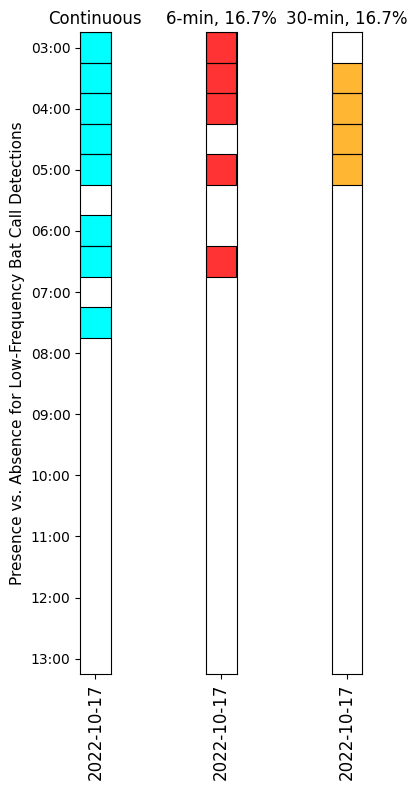

In [131]:
plt.figure(figsize=(5, 8))
plt.rcParams.update({'font.size': 10})

plt.subplot(131)
plt.title("Continuous")
plt.ylabel("Presence vs. Absence for Low-Frequency Bat Call Detections", fontsize=11)
plot_cp_overdays = c_lfpresence_over_days.T
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks(time_ticks, datetime_info[::2])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.subplot(132)
plt.title("6-min, 16.7%")
plot_p1_overdays = lfpresence1_over_days.T
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.subplot(133)
plt.title("30-min, 16.7%")
plot_p2_overdays = lfpresence2_over_days.T
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

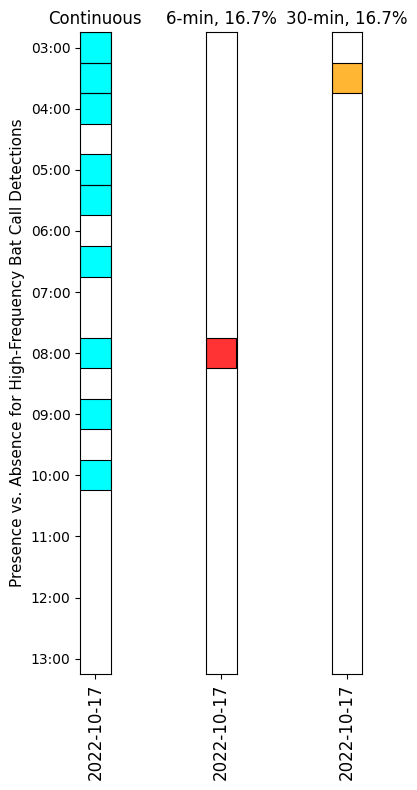

In [132]:
plt.figure(figsize=(5, 8))
plt.rcParams.update({'font.size': 10})

plt.subplot(131)
plt.title("Continuous")
plt.ylabel("Presence vs. Absence for High-Frequency Bat Call Detections", fontsize=11)
plot_cp_overdays = c_hfpresence_over_days.T
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks(time_ticks, datetime_info[::2])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.subplot(132)
plt.title("6-min, 16.7%")
plot_p1_overdays = hfpresence1_over_days.T
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.subplot(133)
plt.title("30-min, 16.7%")
plot_p2_overdays = hfpresence2_over_days.T
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90, fontsize=12)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/hf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

In [133]:
bar_alpha = 0.8
continuous_bar_color = 'cyan'
comparison_6min_bar_color = 'red'
comparison_30min_bar_color = 'orange'
y_label_fontsize = 16
x_label_fontsize = 16
bar_edgecolor = 'black'
bar_width = 1

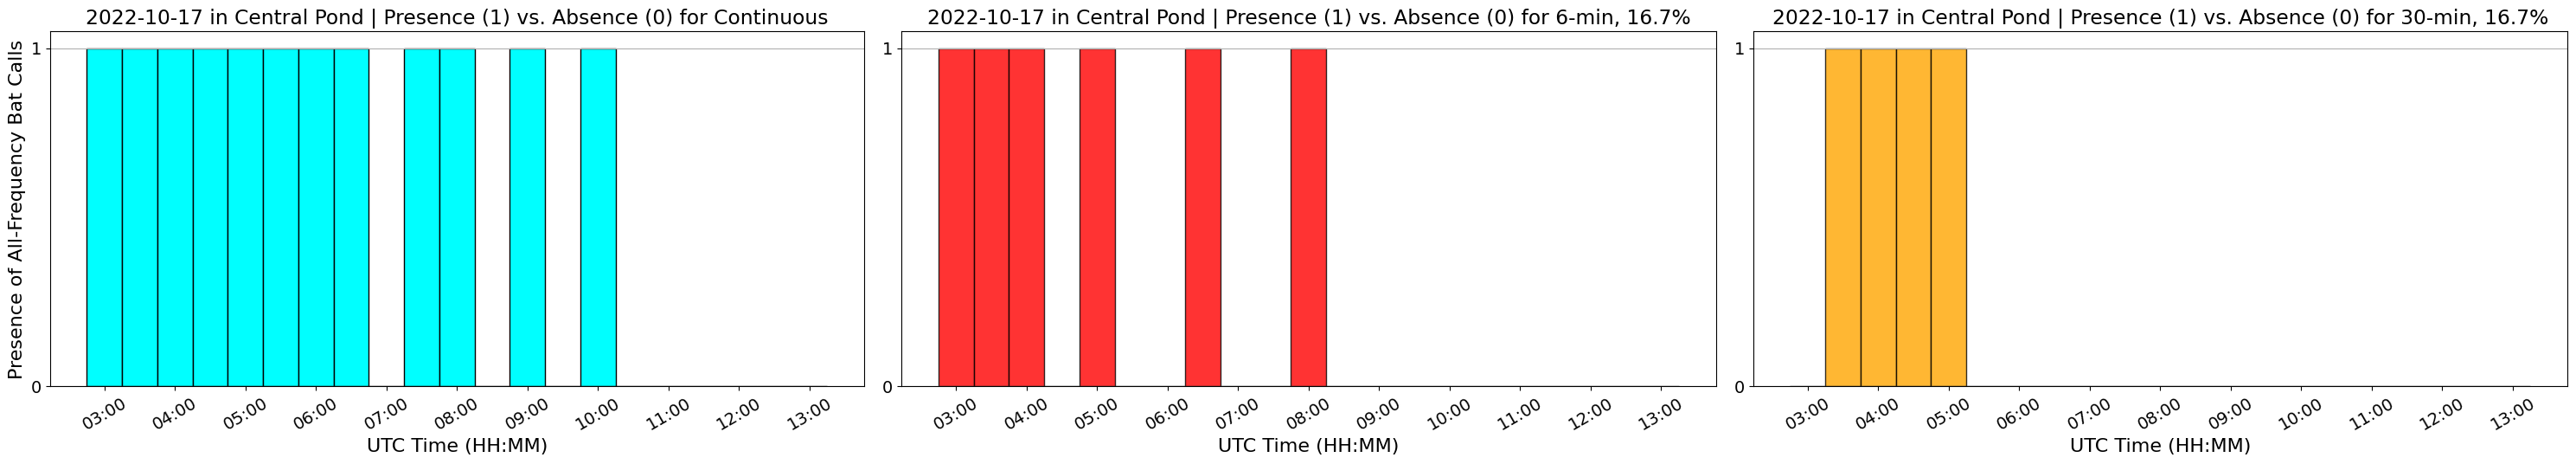

In [134]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 14})

plot_date = (dt.datetime.strptime(dates[-1], '%Y%m%d')).date()

plt.subplot(331)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_presence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.ylabel("Presence of All-Frequency Bat Calls", fontsize=y_label_fontsize)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(332)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, presence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(333)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, presence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_&_hf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

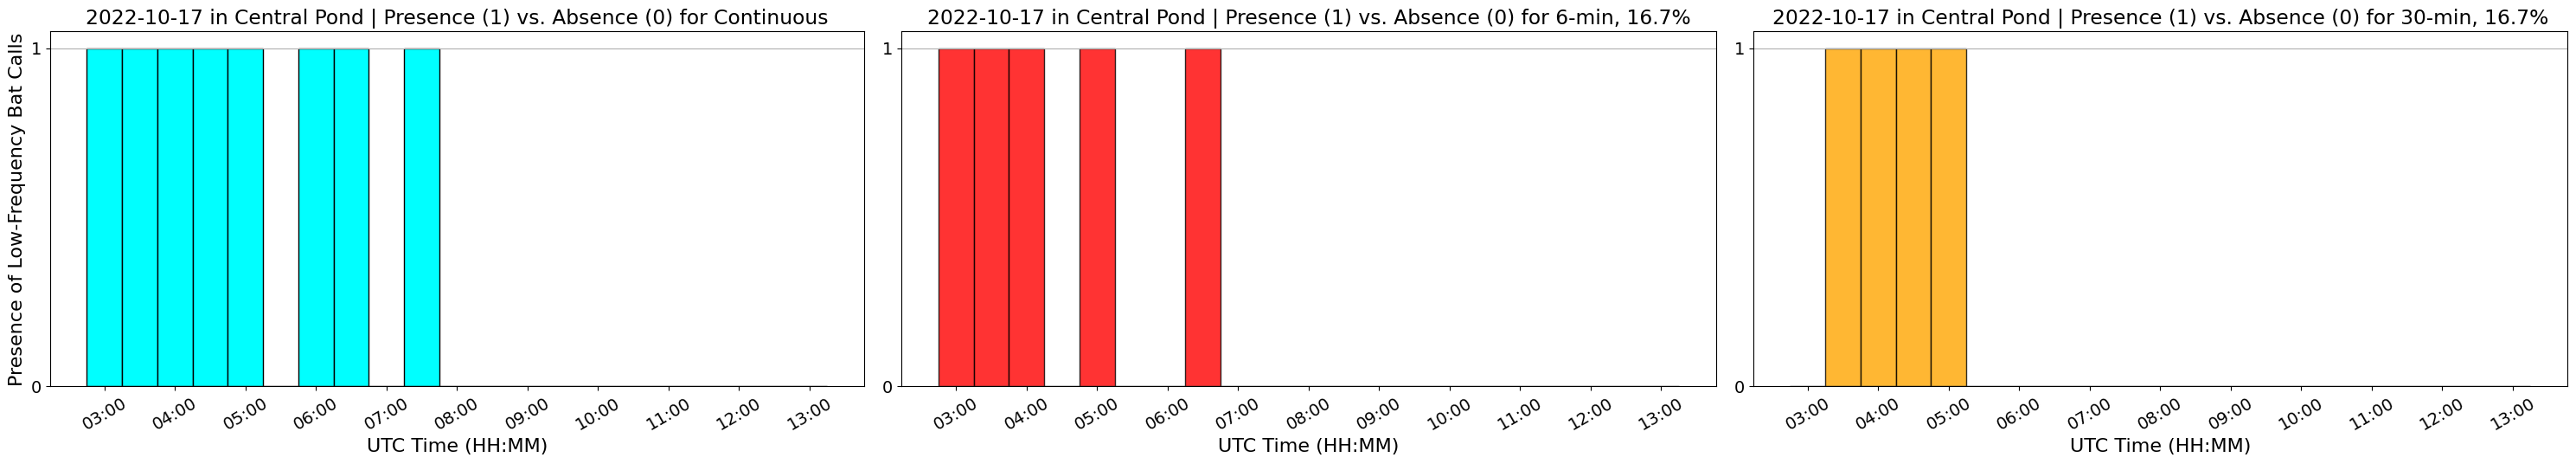

In [135]:
plt.figure(figsize=(30, 15))

plt.subplot(331)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_lfpresence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.ylabel("Presence of Low-Frequency Bat Calls", fontsize=y_label_fontsize)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(332)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, lfpresence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(333)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, lfpresence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

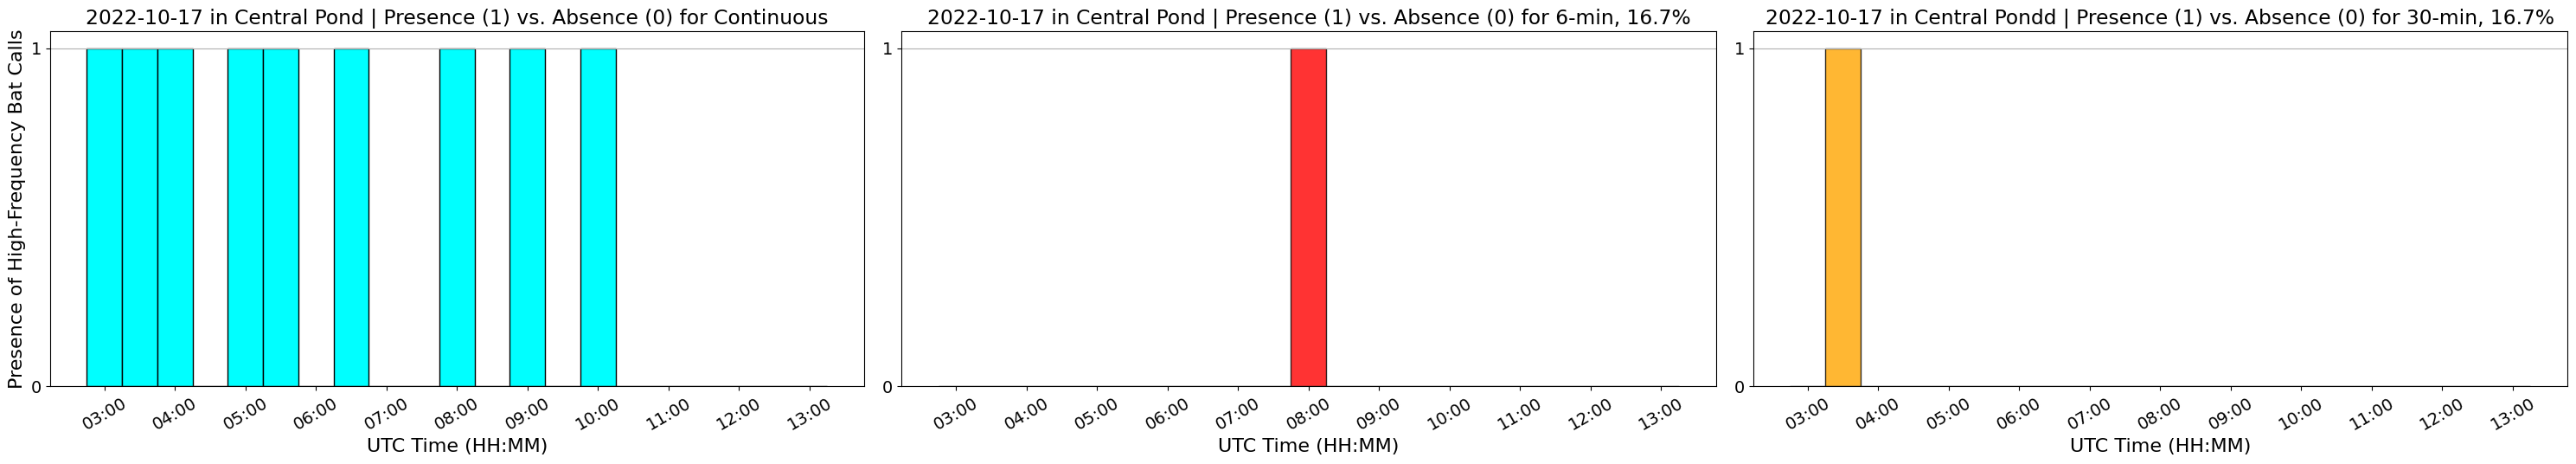

In [136]:
plt.figure(figsize=(30, 15))

plt.subplot(331)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_hfpresence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.ylabel("Presence of High-Frequency Bat Calls", fontsize=y_label_fontsize)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(332)
plt.title(f"{plot_date} in {location} | Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, hfpresence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(333)
plt.title(f"{plot_date} in {location}d | Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, hfpresence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/hf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

In [137]:
bar_alpha = 0.8
continuous_bar_color = 'cyan'
comparison_6min_bar_color = 'red'
comparison_30min_bar_color = 'orange'
legend_loc = 1
bar_edgecolor = 'black'

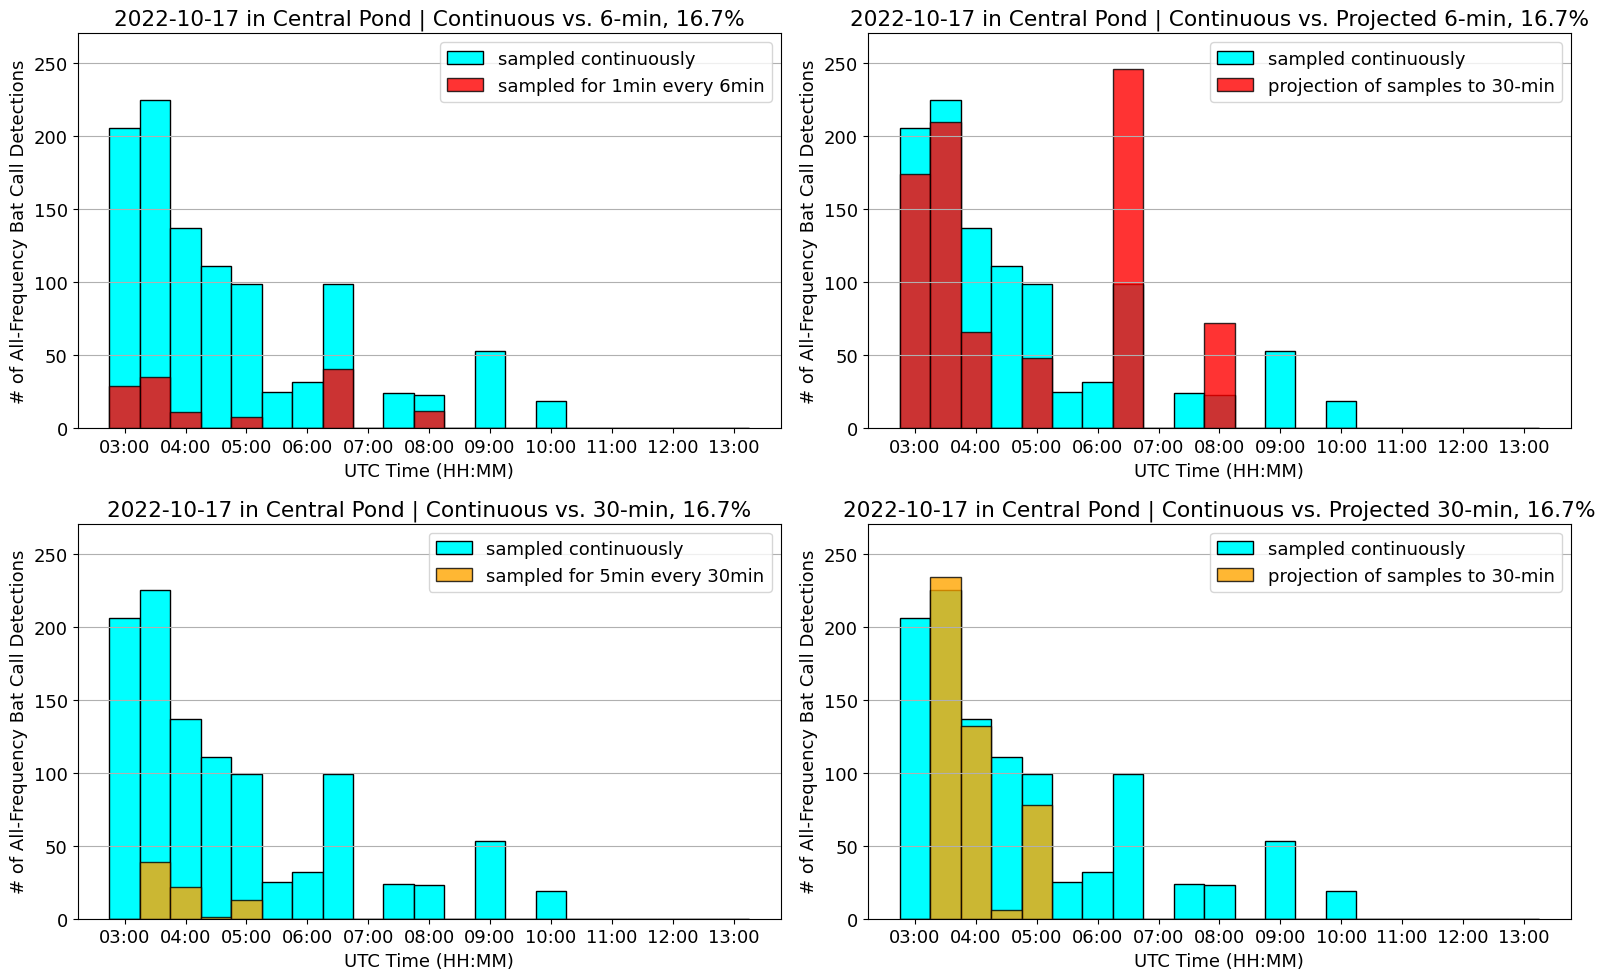

In [138]:
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(221)
plt.title(f"{plot_date} in {location} | Continuous vs. 6-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets1, width=1, label="sampled for 1min every 6min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(222)
plt.title(f"{plot_date} in {location} | Continuous vs. Projected 6-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets1*6, width=1, label="projection of samples to 30-min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(223)
plt.title(f"{plot_date} in {location} | Continuous vs. 30-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets2, width=1, label="sampled for 5min every 30min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(224)
plt.title(f"{plot_date} in {location} | Continuous vs. Projected 30-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets2*6, width=1, label="projection of samples to 30-min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_lf_&_hf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

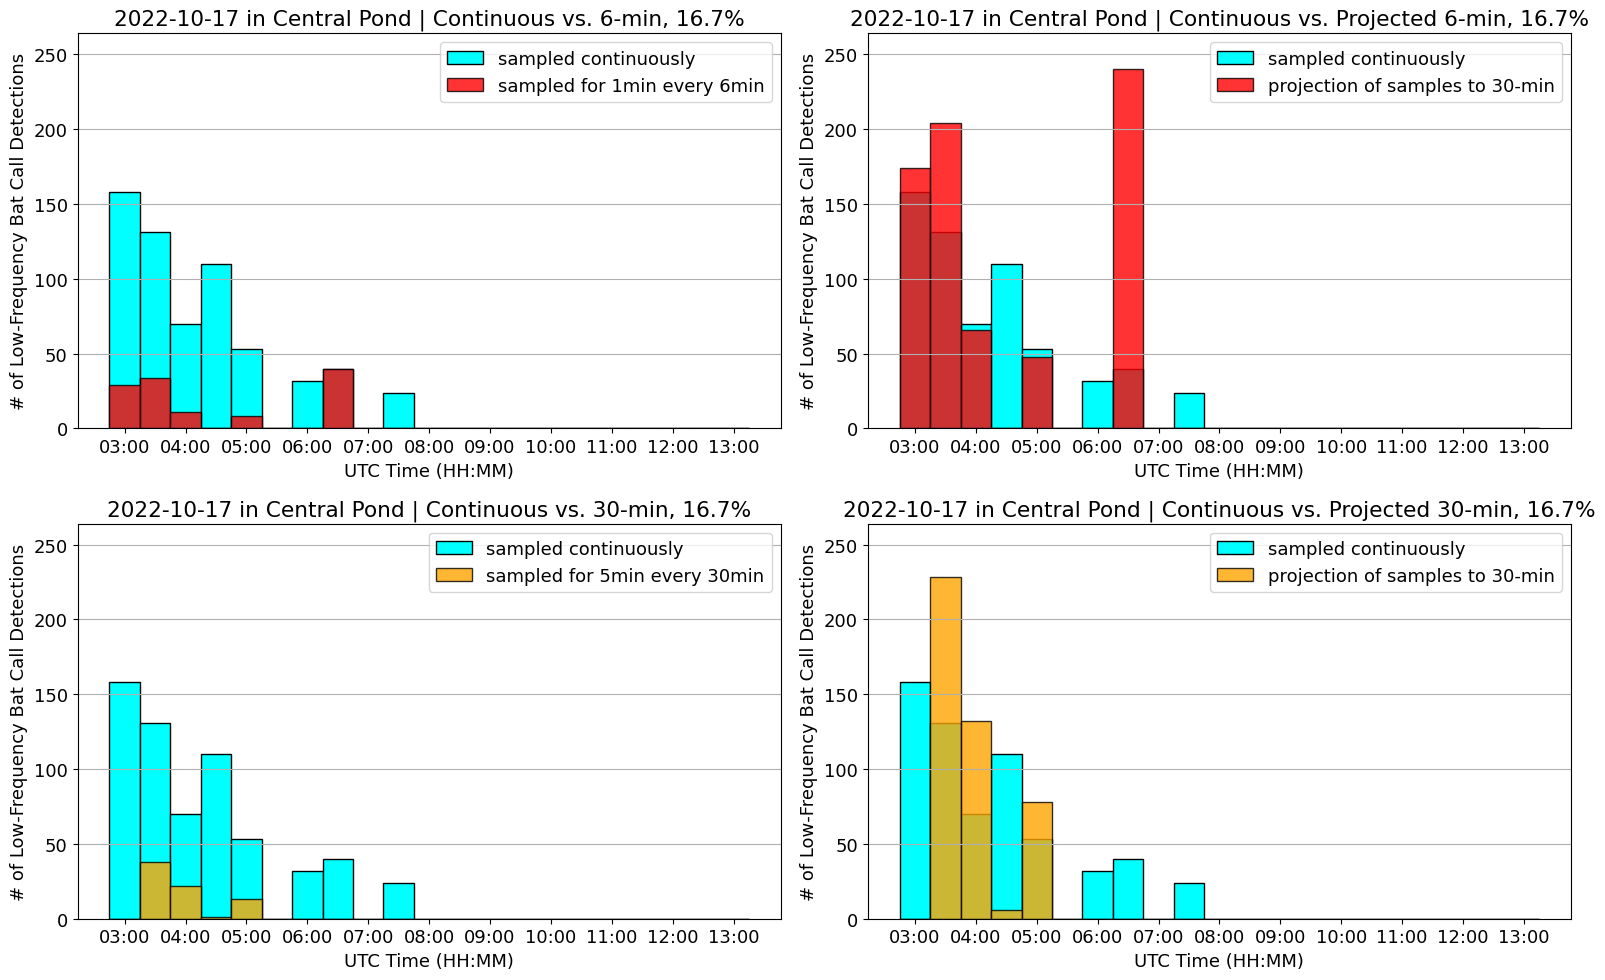

In [139]:
plt.figure(figsize=(16, 10))
legend_loc = 1

plt.subplot(221)
plt.title(f"{plot_date} in {location} | Continuous vs. 6-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets1, width=1, label="sampled for 1min every 6min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(222)
plt.title(f"{plot_date} in {location} | Continuous vs. Projected 6-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets1*6, width=1, label="projection of samples to 30-min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(223)
plt.title(f"{plot_date} in {location} | Continuous vs. 30-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets2, width=1, label="sampled for 5min every 30min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(224)
plt.title(f"{plot_date} in {location} | Continuous vs. Projected 30-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets2*6, width=1, label="projection of samples to 30-min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_lf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

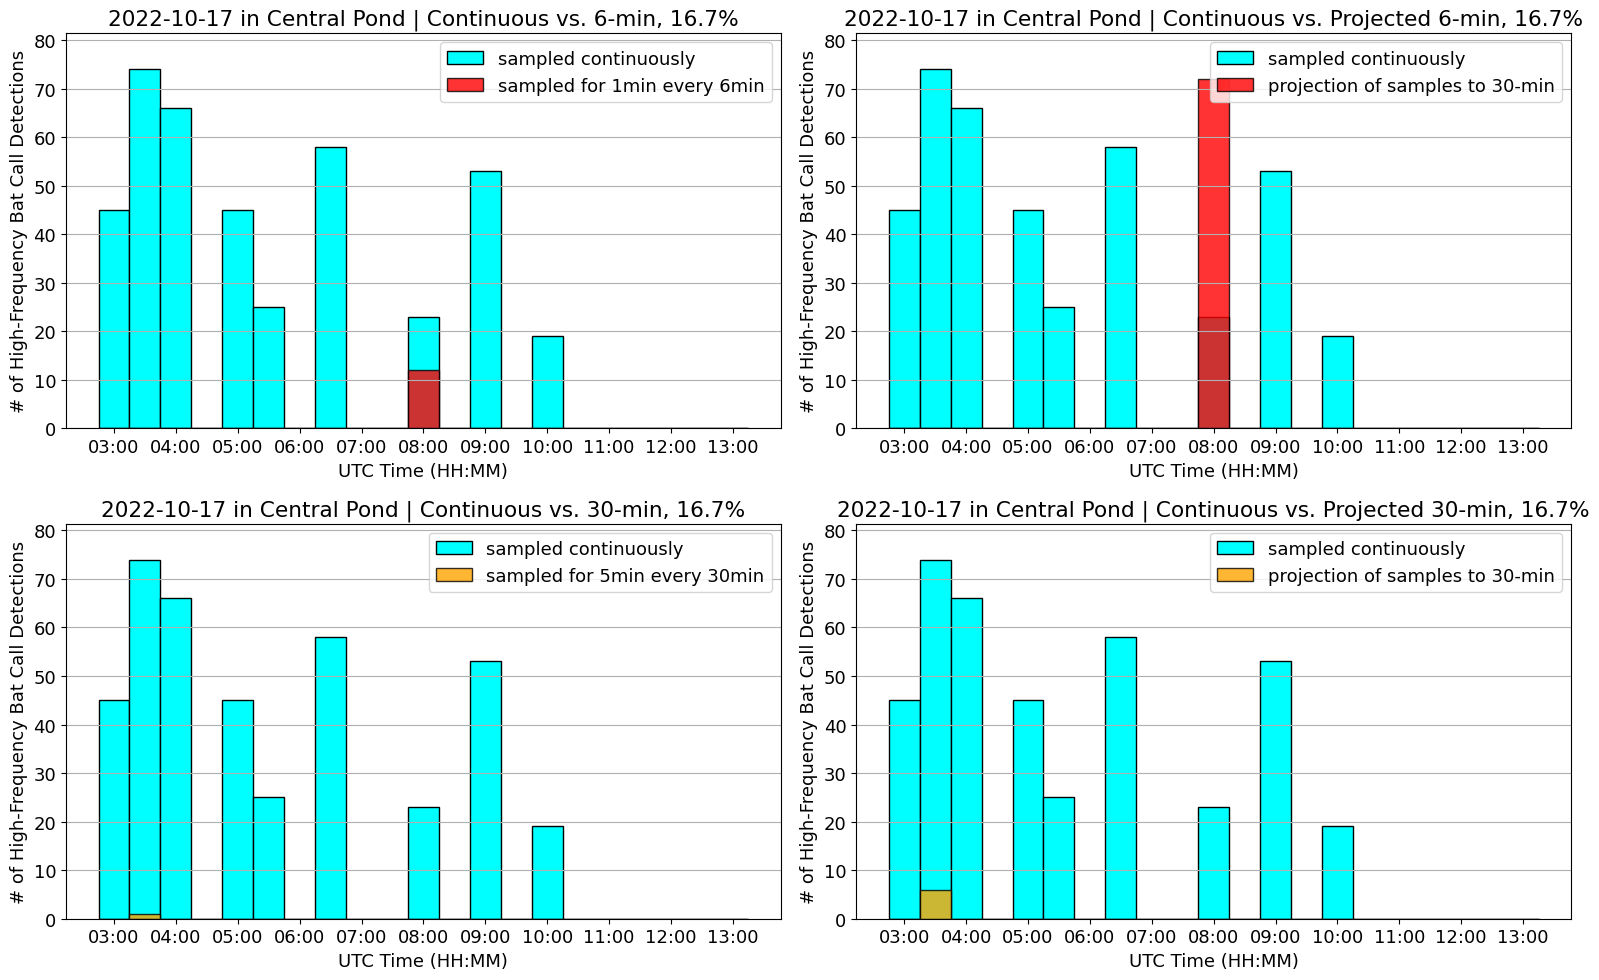

In [140]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.title(f"{plot_date} in {location} | Continuous vs. 6-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets1, width=1, label="sampled for 1min every 6min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(222)
plt.title(f"{plot_date} in {location} | Continuous vs. Projected 6-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets1*6, width=1, label="projection of samples to 30-min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(223)
plt.title(f"{plot_date} in {location} | Continuous vs. 30-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets2, width=1, label="sampled for 5min every 30min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(224)
plt.title(f"{plot_date} in {location} | Continuous vs. Projected 30-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets2*6, width=1, label="projection of samples to 30-min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_hf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()